In [8]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import pickle
from pathlib import Path
import os
import pandas as pd
import scanpy as sc
import cellink as cl
from cellink.tl._burden_testing import *
from plotting_report import *

## this notebook is used to compare performance of burden types

In [2]:
df_to_plot = pd.read_csv("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/association/all_results_summary_newest.csv")


In [4]:
df_to_plot_filtered =df_to_plot[~df_to_plot["celltype"].isin(["Erythrocytes", "Platelets"])]
df_to_plot_filtered

celltype               annotation   n               celltype_annotation
0     CD8 ET               CADD_PHRED  27                 CD8 ET_CADD_PHRED
1     CD8 ET                DNA_LM_up   1                  CD8 ET_DNA_LM_up
2     CD8 ET              DNA_LM_down   1                CD8 ET_DNA_LM_down
3     CD8 ET            MAF_beta_1.25  19              CD8 ET_MAF_beta_1.25
4     CD8 ET          DNA_LM_combined   7            CD8 ET_DNA_LM_combined
..       ...                      ...  ..                               ...
85  CD4 SOX4                DNA_LM_up   3                CD4 SOX4_DNA_LM_up
86  CD4 SOX4              DNA_LM_down   3              CD4 SOX4_DNA_LM_down
87  CD4 SOX4            MAF_beta_1.25   1            CD4 SOX4_MAF_beta_1.25
88  CD4 SOX4          DNA_LM_combined   6          CD4 SOX4_DNA_LM_combined
89  CD4 SOX4  GENE_TSS_DISTANCE_SAIGE   0  CD4 SOX4_GENE_TSS_DISTANCE_SAIGE

[84 rows x 4 columns]

/data/nasif12/home_if12/l_back/sysGen/sc-genetics/docs/notebooks/plotting_report.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/data/nasif12/home_if12/l_back/sysGen/sc-genetics/docs/notebooks/plotting_report.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/data/nasif12/home_if12/l_back/sysGen/sc-genetics/docs/notebooks/plotting_report.py:189: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


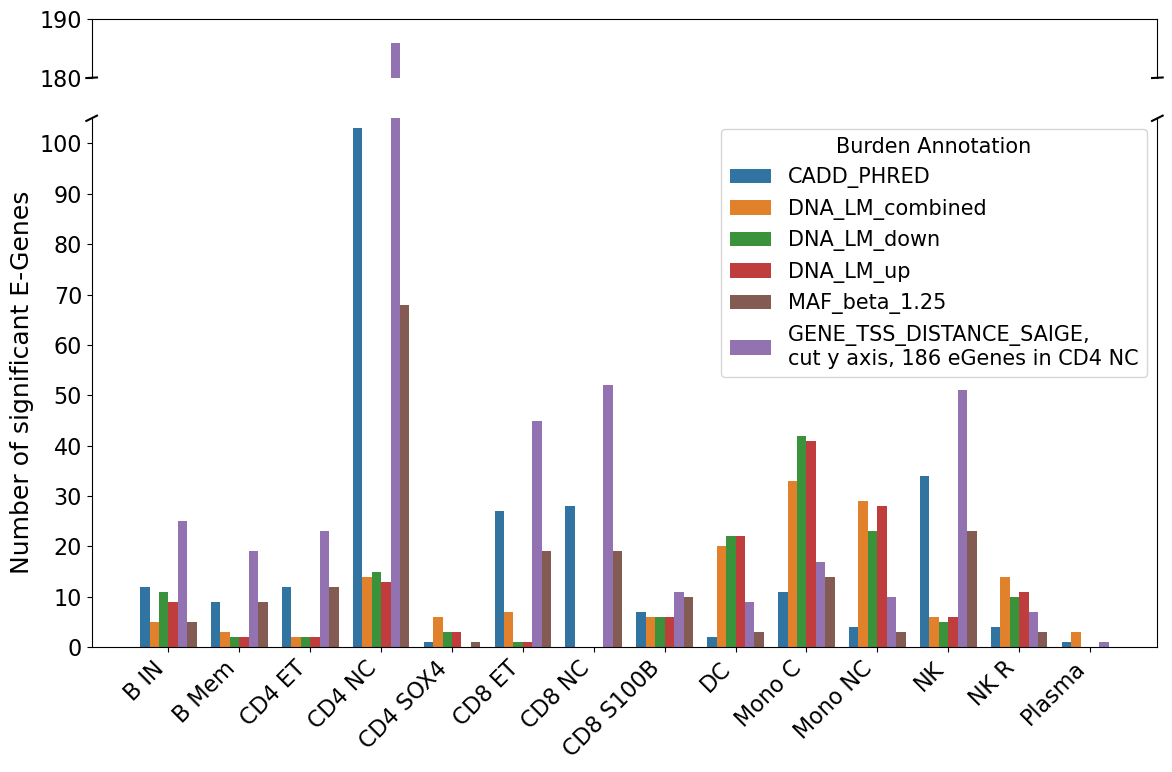

In [11]:
plot_egenes_with_broken_axis(df_to_plot_filtered)

In [13]:
df_final_FDR = pd.read_csv('/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/association/all_results_FDR_corrected_newest.csv') 
df_final_FDR

Unnamed: 0      burden_gene      target_gene              burden_type  \
0                0  ENSG00000228463  ENSG00000228463               CADD_PHRED   
1                1  ENSG00000228327  ENSG00000228327               CADD_PHRED   
2                2  ENSG00000237491  ENSG00000237491               CADD_PHRED   
3                3  ENSG00000225880  ENSG00000225880               CADD_PHRED   
4                4  ENSG00000230368  ENSG00000230368               CADD_PHRED   
...            ...              ...              ...                      ...   
855235      885379  ENSG00000025708  ENSG00000025708  GENE_TSS_DISTANCE_SAIGE   
855236      885380  ENSG00000130487  ENSG00000130487  GENE_TSS_DISTANCE_SAIGE   
855237      885381  ENSG00000100288  ENSG00000100288  GENE_TSS_DISTANCE_SAIGE   
855238      885382  ENSG00000100299  ENSG00000100299  GENE_TSS_DISTANCE_SAIGE   
855239      885383  ENSG00000079974  ENSG00000079974  GENE_TSS_DISTANCE_SAIGE   

          pvalue      beta cell_type  chromosome  significant  FDR_corrected  \
0       0.393581 -0.004054    CD8 ET           1        False       0.955526   
1       0.348254 -0.002507    CD8 ET           1        False       0.947938   
2       0.617412 -0.001265    CD8 ET           1        False       0.979683   
3       0.924011 -0.000300    CD8 ET           1        False       0.997450   
4       0.532657  0.002424    CD8 ET           1        False       0.970296   
...          ...       ...       ...         ...          ...            ...   
855235  0.025474  0.204241  CD4 SOX4          22        False       0.952057   
855236  0.479896  0.030682  CD4 SOX4          22        False       0.974223   
855237  0.652267 -0.021894  CD4 SOX4          22        False       0.974223   
855238  0.589528  0.034830  CD4 SOX4          22        False       0.974223   
855239  0.531652 -0.048066  CD4 SOX4          22        False       0.974223   

                     celltype-annotation  
0                      CD8 ET-CADD_PHRED  
1                      CD8 ET-CADD_PHRED  
2                      CD8 ET-CADD_PHRED  
3                      CD8 ET-CADD_PHRED  
4                      CD8 ET-CADD_PHRED  
...                                  ...  
855235  CD4 SOX4-GENE_TSS_DISTANCE_SAIGE  
855236  CD4 SOX4-GENE_TSS_DISTANCE_SAIGE  
855237  CD4 SOX4-GENE_TSS_DISTANCE_SAIGE  
855238  CD4 SOX4-GENE_TSS_DISTANCE_SAIGE  
855239  CD4 SOX4-GENE_TSS_DISTANCE_SAIGE  

[855240 rows x 11 columns]

In [14]:

p1=QQ_plot_sig_egenes(df_final_FDR, \
                        "CADD_PHRED")
p2=QQ_plot_sig_egenes(df_final_FDR, \
                        "GENE_TSS_DISTANCE_SAIGE")
p3=QQ_plot_sig_egenes(df_final_FDR, \
                        "MAF_beta_1.25")
p4=QQ_plot_sig_egenes(df_final_FDR, \
                        "DNA_LM_combined")
p5=QQ_plot_sig_egenes(df_final_FDR, \
                        "DNA_LM_up")
p6=QQ_plot_sig_egenes(df_final_FDR, \
                        "DNA_LM_down")


[2025-02-04 11:16:28,134] INFO:matplotlib.font_manager: Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
[2025-02-04 11:16:31,542] INFO:matplotlib.font_manager: Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
[2025-02-04 11:16:34,953] INFO:matplotlib.font_manager: Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
[2025-02-04 11:16:38,340] INFO:matplotlib.font_manager: Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


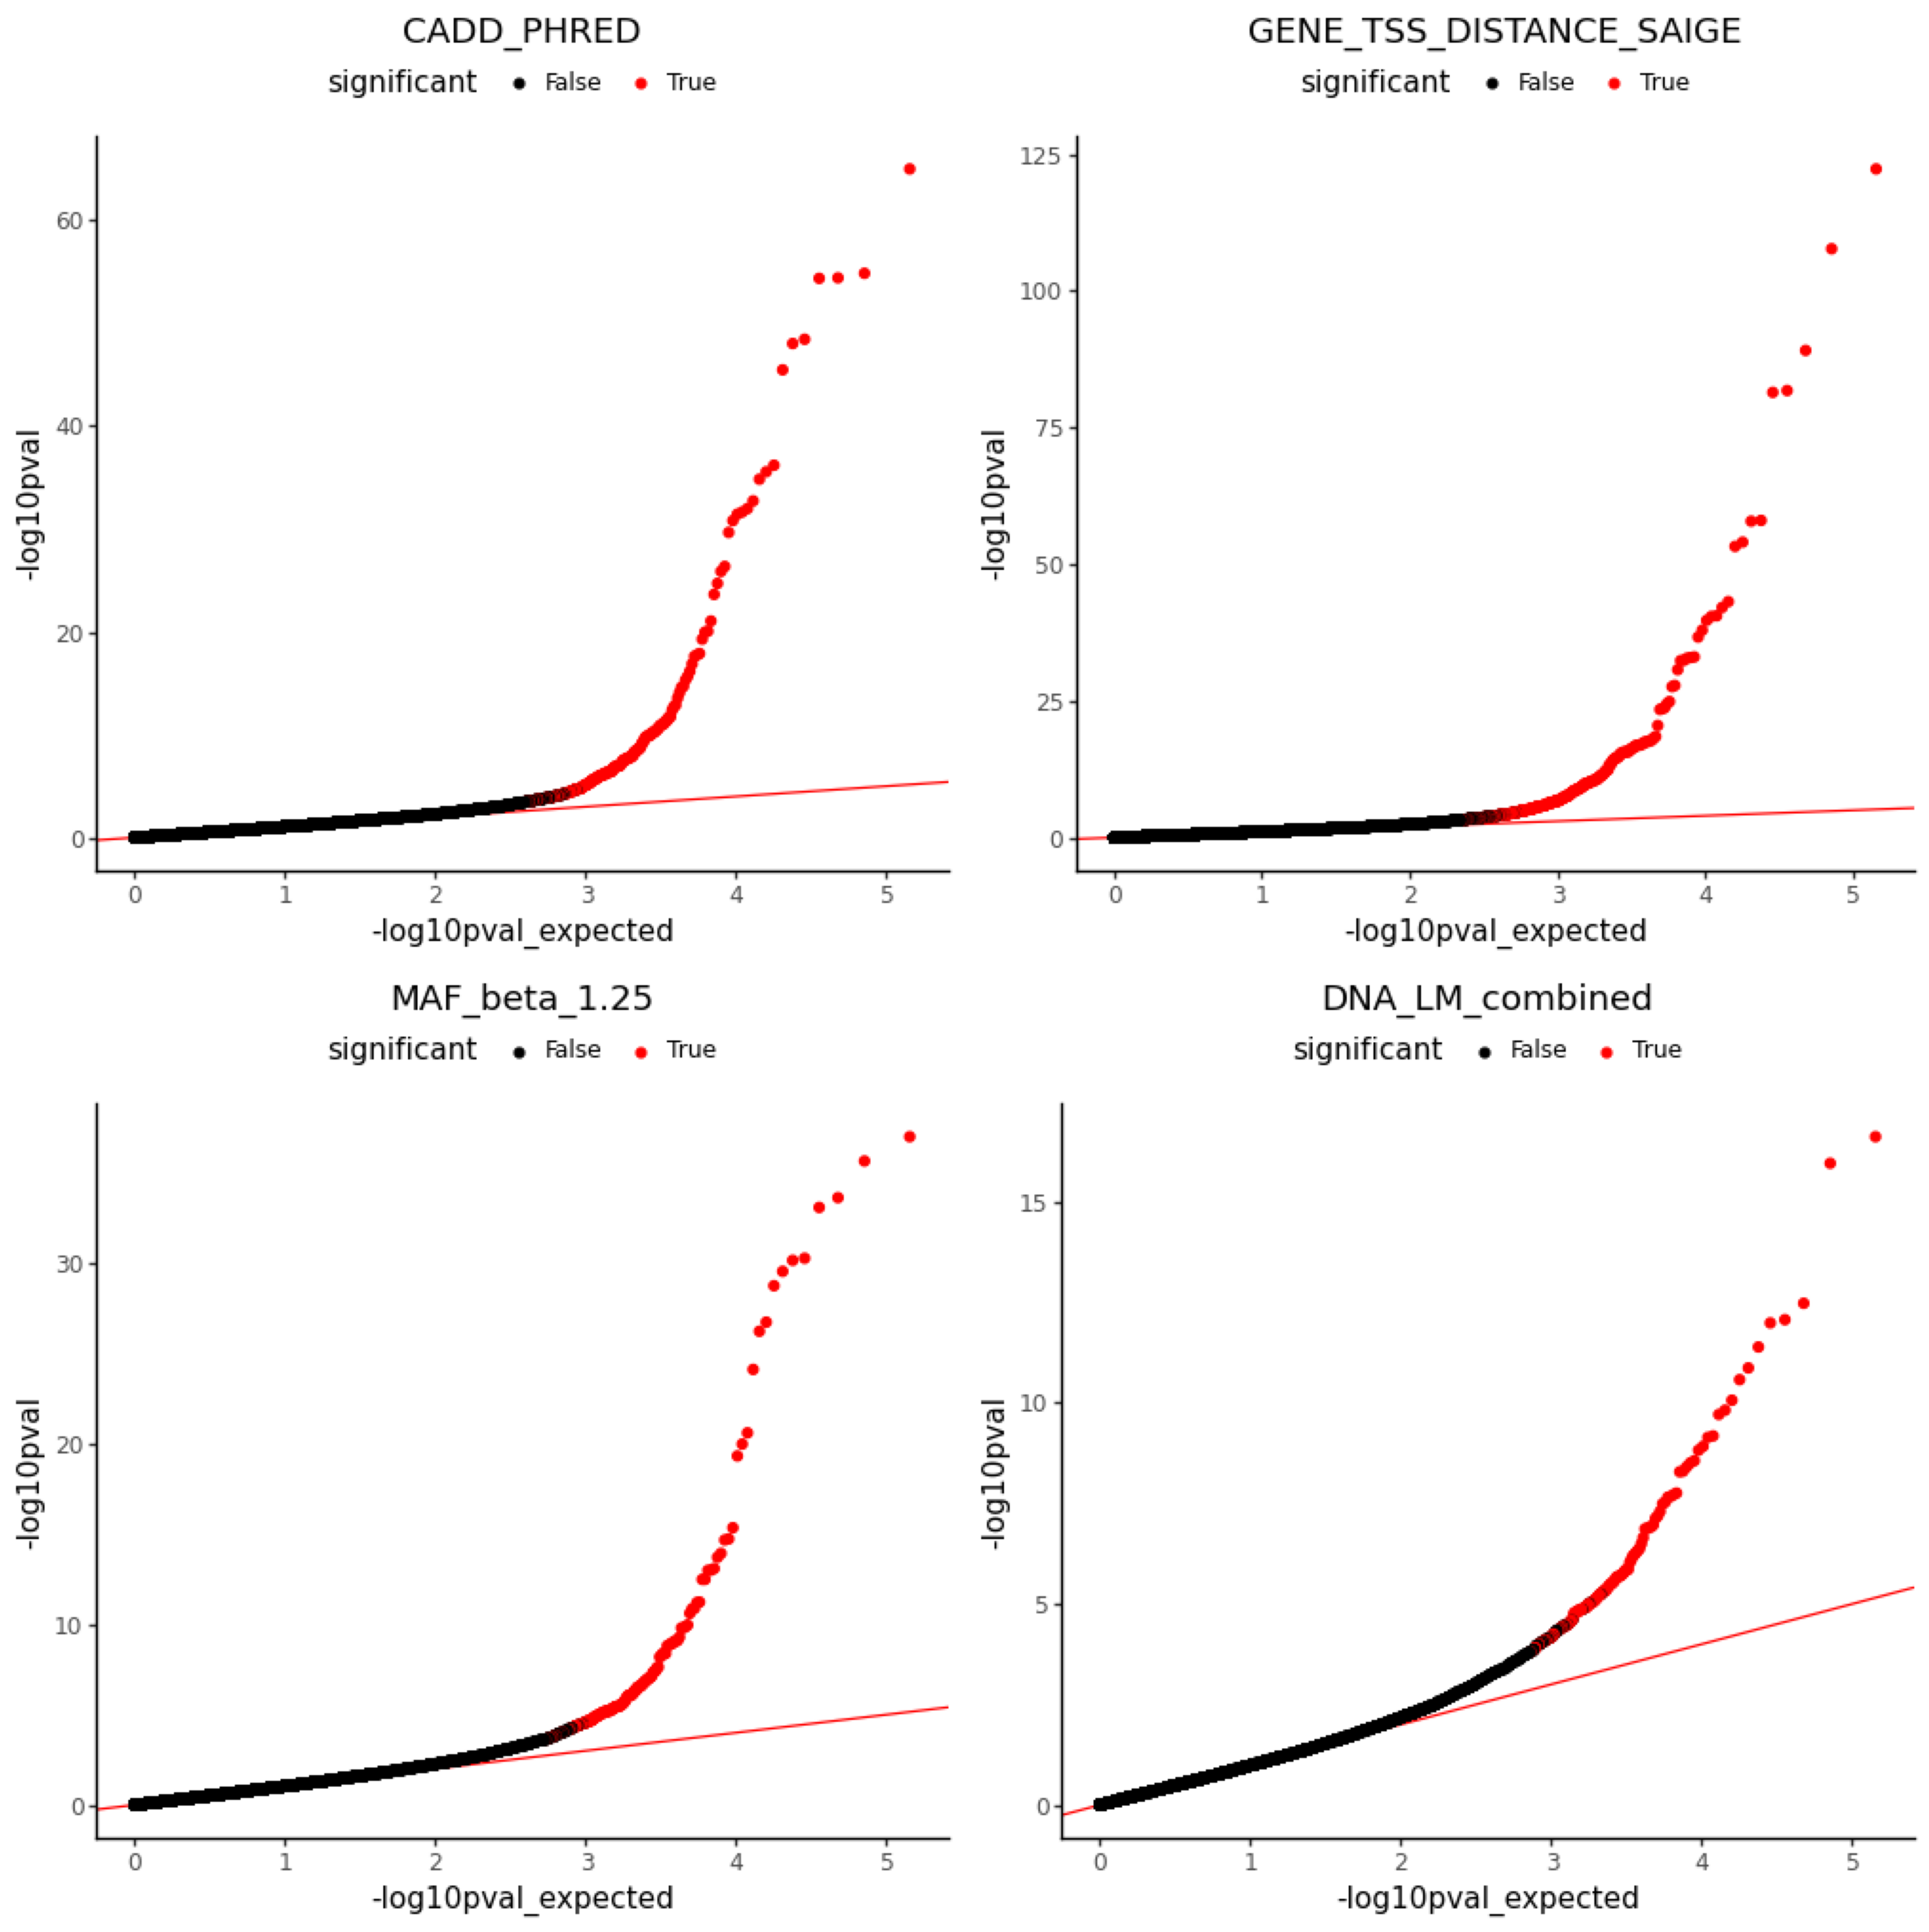

In [16]:
plotnine_grid2([p1,p2, p3, p4], row=2, col=2, figsize=(30, 30))

[2025-02-04 11:16:50,043] INFO:matplotlib.font_manager: Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
[2025-02-04 11:16:53,483] INFO:matplotlib.font_manager: Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
[2025-02-04 11:16:56,958] INFO:matplotlib.font_manager: Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
[2025-02-04 11:17:00,417] INFO:matplotlib.font_manager: Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
[2025-02-04 11:17:03,863] INFO:matplotlib.font_manager: Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
[2025-02-04 11:17:07,341] INFO:matplotlib.font_manager: Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


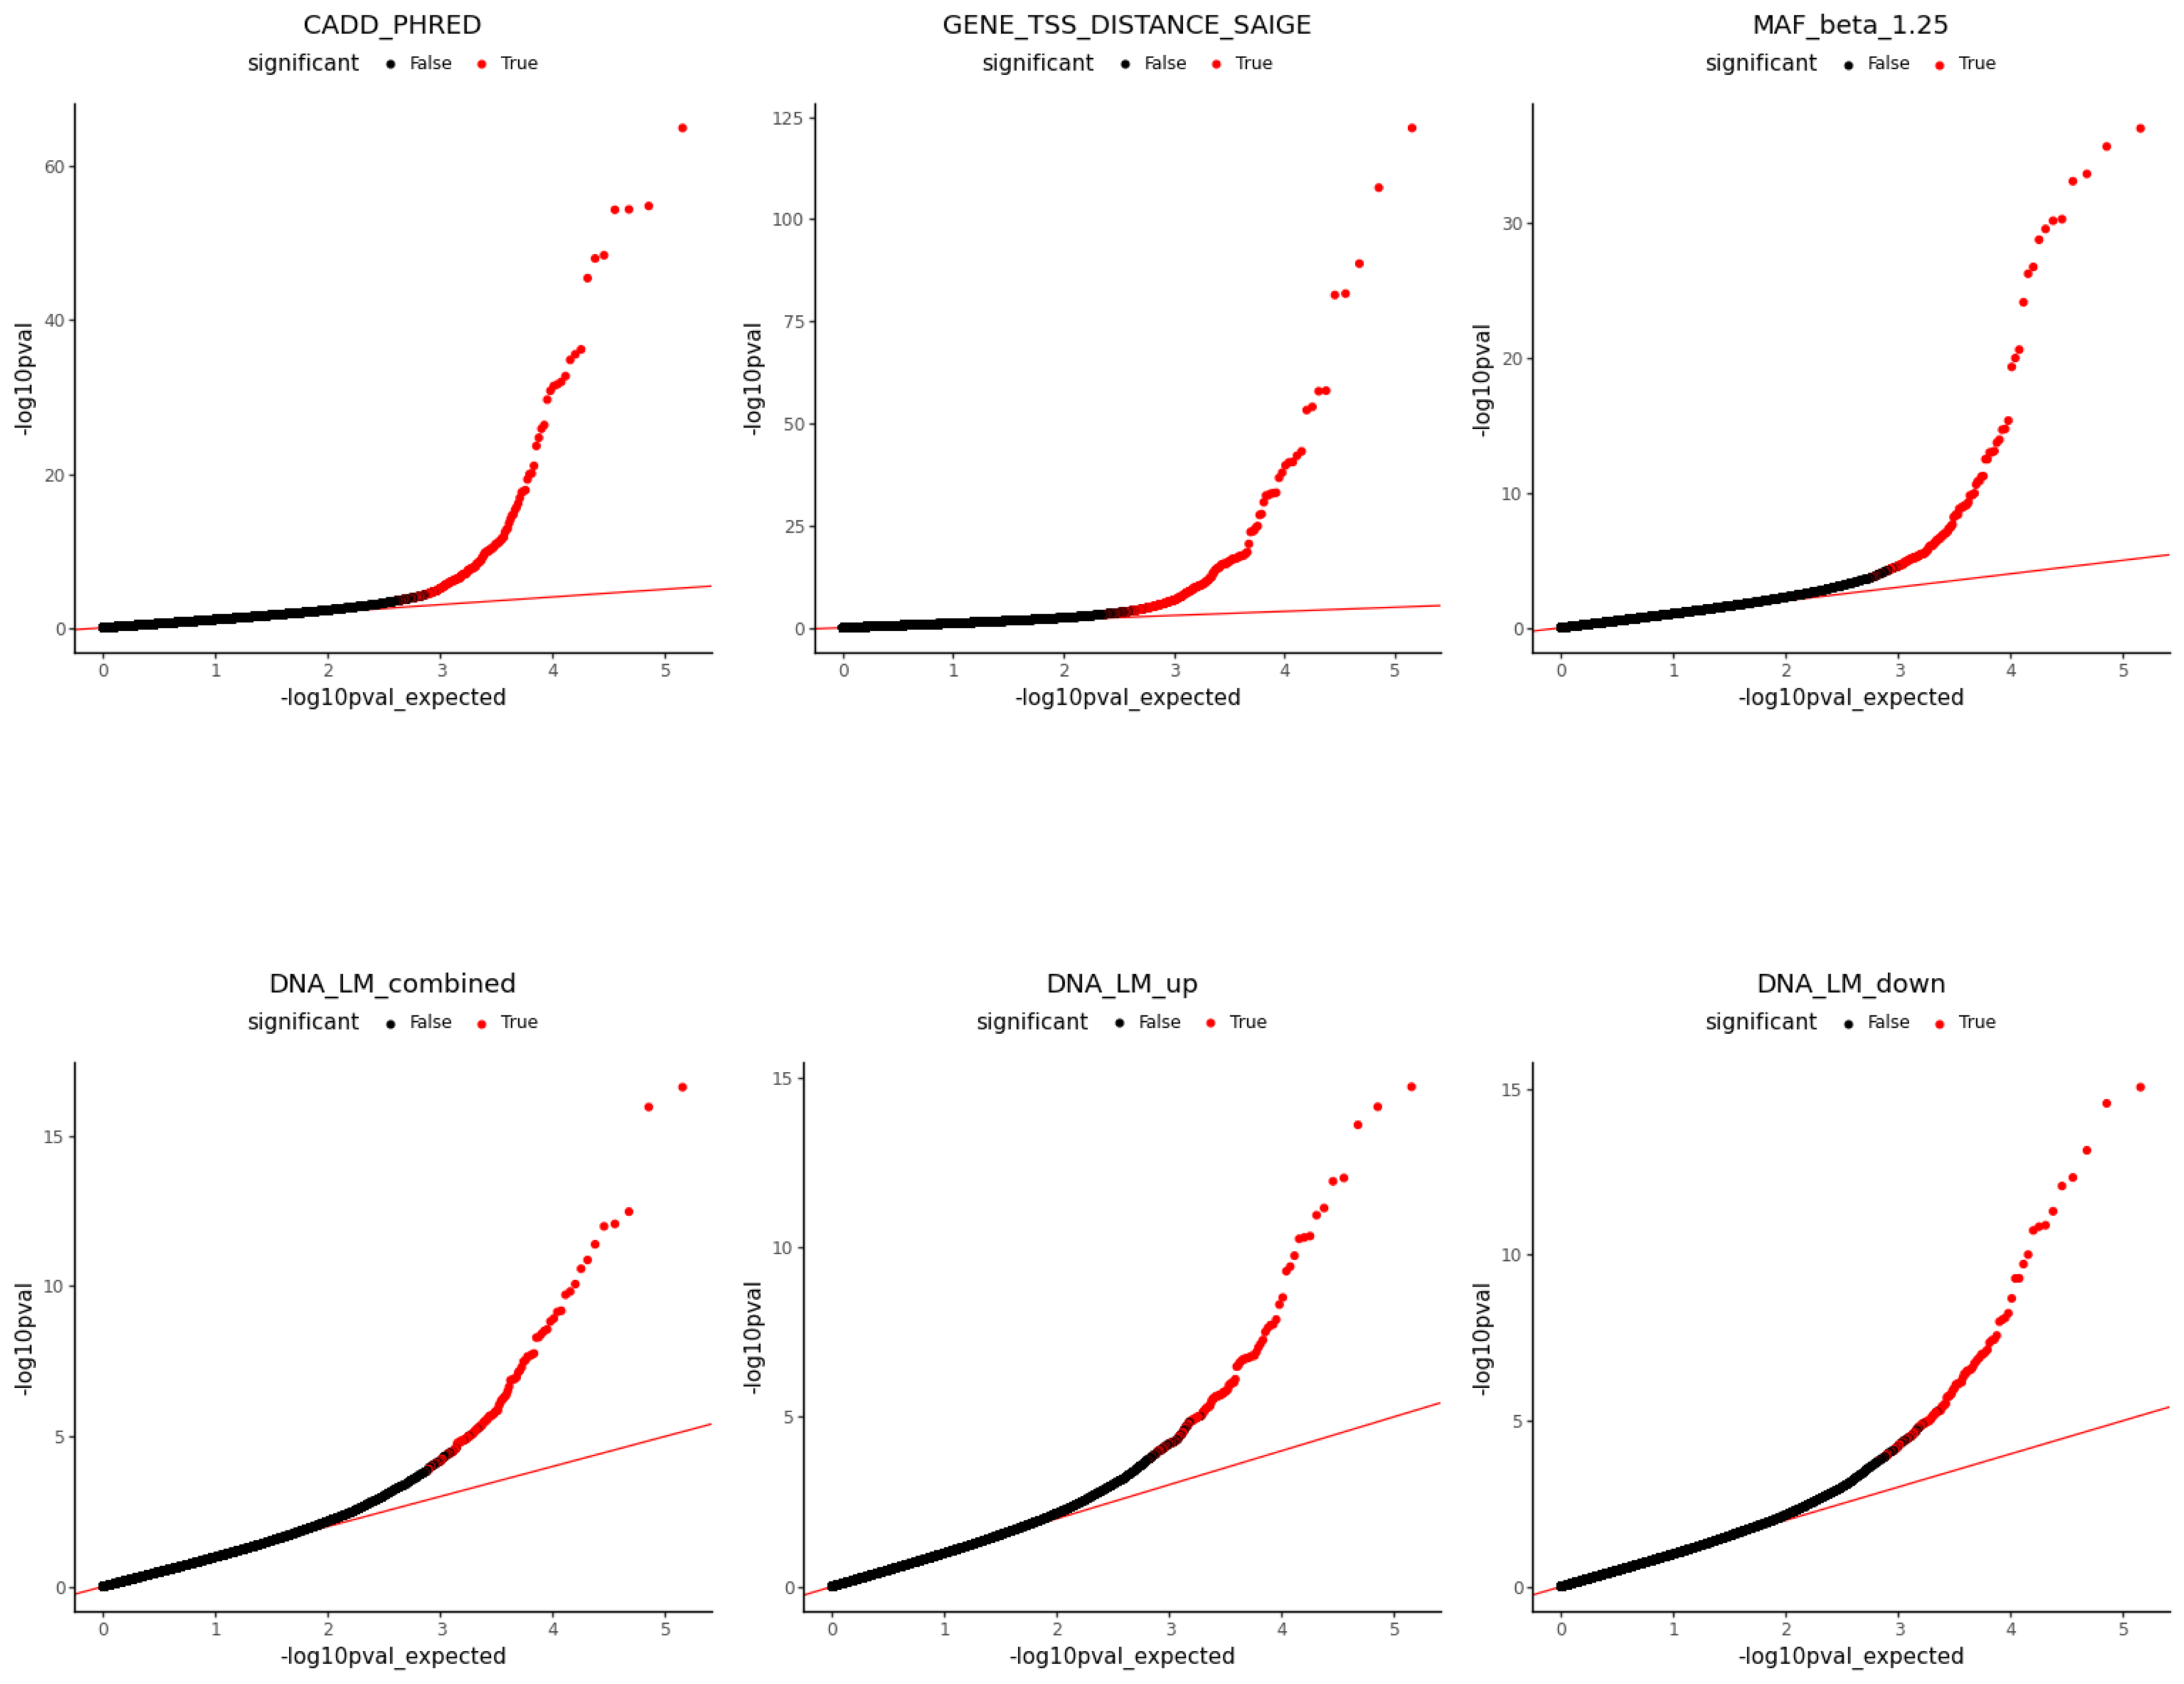

In [17]:
plotnine_grid2([p1,p2, p3, p4, p5, p6])